### 1.4 Search for best hypterparameters

In [1]:
import numpy as np
import tensorflow as tf
import datetime
import time
import pickle
import matplotlib.pyplot as plt
import os
import time
import sys
from mpl_toolkits import mplot3d
from numpy.linalg import eig, inv
from matplotlib.patches import Ellipse
%matplotlib inline

In [14]:
def plot_curves(dic, xlabel, title, legends=None, filename=None, tst=True):
    ''' plot multiple curves
        input: lines: a list of lists lines[i] is a curve indexed by its natural index
               xlabel, ylabel: the name of the axis
               title: title shown on top
               legends: the name of the curves
               filename: if exists then save to directory
    '''

    plt.figure(1, figsize=(15, 5))
    
    if tst is False:
        line_loss = [dic['trn_loss'], dic['val_loss']]
        line_acc = [dic['trn_acc'], dic['val_acc']]
    else:
        line_loss = [dic['trn_loss'], dic['val_loss'], dic['tst_loss']]
        line_acc = [dic['trn_acc'], dic['val_acc'], dic['tst_acc']]
        
    for i in range(len(line_loss)):
        line_i = line_loss[i]
        x = list(range(len(line_i)))
        ax1 = plt.subplot(121)
        ax1.plot(x, line_i, label=legends[i])
        
        plt.title(title + ' (Loss)')
        plt.legend(shadow=True, fancybox=True)
        plt.xlabel(xlabel)
        plt.ylabel('Loss')
    
    for i in range(len(line_acc)):
        line_i = line_acc[i]
        x = list(range(len(line_i)))
        ax2 = plt.subplot(122)
        ax2.plot(x, line_i, label=legends[i])
        
        plt.title(title + ' (Accuracy)')
        plt.legend(shadow=True, fancybox=True)
        plt.xlabel(xlabel)
        plt.ylabel('Accuracy')
    
    plt.savefig(filename + '.pdf')
    return

D:\Apps\Anaconda\envs\tensorflow\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


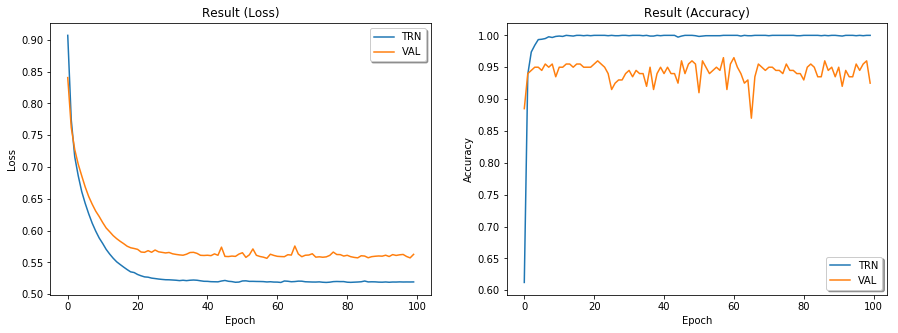

In [25]:
with open('./result.p', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    res = u.load()
    
plot_curves(res,
           'Epoch',
           'Result',
           legends=['TRN', 'VAL'], filename='modelb_loss_acc', tst=False)

In [18]:
print('{0:.6f}'.format(res['trn_loss'][-1]))
print('{0:.6f}'.format(res['val_loss'][-1]))
print()
print('{0:.6f}'.format(res['trn_acc'][-1]))
print('{0:.6f}'.format(res['val_acc'][-1]))


0.517400
0.536583

0.998333
0.945000


In [3]:
x1 = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
y1 = [0.05, 0.075, 0.0875, 0.1125, 0.125, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
z1 = []
d1 = np.asarray(y1) - np.asarray(x1)
r1 = d1/x1

index = ['05', '075', '0875', '1125', '125', '15', '2', '3', '4', '5', '6', '7', '8', '9']

for i in index:
    with open('./model_1/model_1_' + i + '/result.p', 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        res = u.load()
    
    z1 = np.append(z1, res['val_acc'][-1])

print(z1)
print(d1)
print(r1)

[0.955      0.745      0.59000001 0.50500001 0.70000001 0.87999999
 0.995      1.         1.         1.         1.         1.
 1.         1.        ]
[-0.05   -0.025  -0.0125  0.0125  0.025   0.05    0.1     0.2     0.3
  0.4     0.5     0.6     0.7     0.8   ]
[-0.5   -0.25  -0.125  0.125  0.25   0.5    1.     2.     3.     4.
  5.     6.     7.     8.   ]


In [4]:
x2 = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
y2 = [0.1, 0.15, 0.175, 0.1875, 0.2125, 0.225, 0.25, 0.3, 0.35, 0.4]
z2 = [0.995]
d2 = np.asarray(y2) - np.asarray(x2)
r2 = d2/x2

index = ['15', '175', '1875', '2125', '225', '25', '3', '35', '4']

for i in index:
    with open('./model_2/model_2_' + i + '/result.p', 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        res = u.load()
    
    z2 = np.append(z2, res['val_acc'][-1])

print(z2)
print(d2)
print(r2)

[0.995      0.82499999 0.60500001 0.485      0.52500001 0.58000001
 0.75       0.93999999 0.995      1.        ]
[-0.1    -0.05   -0.025  -0.0125  0.0125  0.025   0.05    0.1     0.15
  0.2   ]
[-0.5    -0.25   -0.125  -0.0625  0.0625  0.125   0.25    0.5     0.75
  1.    ]


In [5]:
x3 = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
y3 = [0.1, 0.2, 0.225, 0.25, 0.275, 0.325, 0.35, 0.4, 0.45, 0.5]
z3 = [1, 0.94]
d3 = np.asarray(y3) - np.asarray(x3)
r3 = d3/x3

index = ['225', '25', '275', '325', '35', '4', '45', '5']

for i in index:
    with open('./model_3/model_3_' + i + '/result.p', 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        res = u.load()
    
    z3 = np.append(z3, res['val_acc'][-1])

print(z3)
print(d3)
print(r3)

[1.         0.94       0.89499999 0.885      0.61000001 0.54500001
 0.71       0.89999999 1.         0.99      ]
[-0.2   -0.1   -0.075 -0.05  -0.025  0.025  0.05   0.1    0.15   0.2  ]
[-0.66666667 -0.33333333 -0.25       -0.16666667 -0.08333333  0.08333333
  0.16666667  0.33333333  0.5         0.66666667]


In [6]:
x4 = [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]
y4 = [0.1, 0.2, 0.25, 0.275, 0.3, 0.35, 0.375, 0.45, 0.5, 0.55, 0.6]
z4 = [1, 1, 0.99, 0.985, 0.90]
d4 = np.asarray(y4) - np.asarray(x4)
r4 = d4/x4

index = ['35', '375', '45', '5', '55', '6']

for i in index:
    with open('./model_4/' + i + '/result.p', 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        res = u.load()
    
    z4 = np.append(z4, res['val_acc'][-1])

print(z4)
print(d4)
print(r4)

[1.         1.         0.99       0.985      0.9        0.66000001
 0.59       0.67       0.86999999 0.97       0.985     ]
[-0.3   -0.2   -0.15  -0.125 -0.1   -0.05  -0.025  0.05   0.1    0.15
  0.2  ]
[-0.75   -0.5    -0.375  -0.3125 -0.25   -0.125  -0.0625  0.125   0.25
  0.375   0.5   ]


In [7]:
x5 = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
y5 = [0.1, 0.3, 0.35, 0.375, 0.4, 0.45, 0.55, 0.6, 0.65, 0.7, 0.75]
z5 = [1, 0.99, 0.985, 0.92499999, 0.87]
d5 = np.asarray(y5) - np.asarray(x5)
r5 = d5/x5

index = ['45', '55', '6', '65', '7', '75']

for i in index:
    with open('./model_5/' + i + '/result.p', 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        res = u.load()
    
    z5 = np.append(z5, res['val_acc'][-1])

print(z5)
print(d5)
print(r5)

[1.         0.99       0.985      0.92499999 0.87       0.695
 0.665      0.82       0.91499999 0.975      0.995     ]
[-0.4   -0.2   -0.15  -0.125 -0.1   -0.05   0.05   0.1    0.15   0.2
  0.25 ]
[-0.8  -0.4  -0.3  -0.25 -0.2  -0.1   0.1   0.2   0.3   0.4   0.5 ]


In [8]:
x6 = [0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
y6 = [0.4, 0.45, 0.5, 0.55, 0.65, 0.7, 0.75, 0.8, 0.85]
z6 = [0.985, 0.956, 0.82]
d6 = np.asarray(y6) - np.asarray(x6)
r6 = d6/x6

index = ['55', '65', '7', '75', '8', '85']

for i in index:
    with open('./model_6/' + i + '/result.p', 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        res = u.load()
    
    z6 = np.append(z6, res['val_acc'][-1])

print(z6)
print(d6)
print(r6)

[0.985      0.956      0.82       0.61500001 0.58000001 0.72
 0.82       0.89999999 0.985     ]
[-0.2  -0.15 -0.1  -0.05  0.05  0.1   0.15  0.2   0.25]
[-0.33333333 -0.25       -0.16666667 -0.08333333  0.08333333  0.16666667
  0.25        0.33333333  0.41666667]


In [9]:
x7 = [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
y7 = [0.45, 0.5, 0.55, 0.6, 0.65, 0.75, 0.8, 0.85, 0.9, 0.95]
z7 = [1, 0.975, 0.89499999, 0.72]
d7 = np.asarray(y7) - np.asarray(x7)
r7 = d7/x7

index = ['65', '75', '8', '85', '9', '95']

for i in index:
    with open('./model_7/' + i + '/result.p', 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        res = u.load()
    
    z7 = np.append(z7, res['val_acc'][-1])

print(z7)
print(d7)
print(r7)

[1.         0.975      0.89499999 0.72       0.595      0.60500001
 0.64000001 0.815      0.91       0.945     ]
[-0.25 -0.2  -0.15 -0.1  -0.05  0.05  0.1   0.15  0.2   0.25]
[-0.35714286 -0.28571429 -0.21428571 -0.14285714 -0.07142857  0.07142857
  0.14285714  0.21428571  0.28571429  0.35714286]


In [10]:
x8 = [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]
y8 = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.85, 0.9, 0.95, 0.975]
z8 = [1, 0.94999999, 0.90, 0.84499999, 0.64]
d8 = np.asarray(y8) - np.asarray(x8)
r8 = d8/x8

index = ['75', '85', '9', '95', '975']

for i in index:
    with open('./model_8/' + i + '/result.p', 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        res = u.load()
    
    z8 = np.append(z8, res['val_acc'][-1])

print(z8)
print(d8)
print(r8)

[1.         0.94999999 0.9        0.84499999 0.64       0.59500001
 0.615      0.66       0.805      0.87499999]
[-0.3   -0.25  -0.2   -0.15  -0.1   -0.05   0.05   0.1    0.15   0.175]
[-0.375   -0.3125  -0.25    -0.1875  -0.125   -0.0625   0.0625   0.125
  0.1875   0.21875]


In [11]:
x9 = [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]
y9 = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.95, 1]
z9 = [0.98, 0.965, 0.91, 0.835, 0.66]
d9 = np.asarray(y9) - np.asarray(x9)
r9 = d9/x9

index = ['85', '95', '10']

for i in index:
    with open('./model_9/' + i + '/result.p', 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        res = u.load()
    
    z9 = np.append(z9, res['val_acc'][-1])

print(z9)
print(d9)
print(r9)

[0.98       0.965      0.91       0.835      0.66       0.51500001
 0.59       0.74      ]
[-0.3  -0.25 -0.2  -0.15 -0.1  -0.05  0.05  0.1 ]
[-0.33333333 -0.27777778 -0.22222222 -0.16666667 -0.11111111 -0.05555556
  0.05555556  0.11111111]


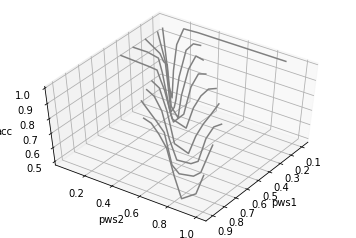

In [95]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
ax.plot3D(x1, y1, z1, 'gray')
ax.plot3D(x2, y2, z2, 'gray')
ax.plot3D(x3, y3, z3, 'gray')
ax.plot3D(x4, y4, z4, 'gray')
ax.plot3D(x5, y5, z5, 'gray')
ax.plot3D(x6, y6, z6, 'gray')
ax.plot3D(x7, y7, z7, 'gray')
ax.plot3D(x8, y8, z8, 'gray')
ax.plot3D(x9, y9, z9, 'gray')

ax.set_xlabel('pws1')
ax.set_ylabel('pws2')
ax.set_zlabel('acc')

ax.view_init(50, 35)
        
plt.savefig('MLP_performance_on_different' + '.pdf')

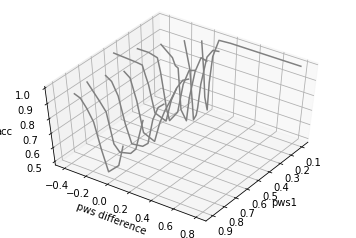

In [28]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
ax.plot3D(x1, d1, z1, 'gray')
ax.plot3D(x2, d2, z2, 'gray')
ax.plot3D(x3, d3, z3, 'gray')
ax.plot3D(x4, d4, z4, 'gray')
ax.plot3D(x5, d5, z5, 'gray')
ax.plot3D(x6, d6, z6, 'gray')
ax.plot3D(x7, d7, z7, 'gray')
ax.plot3D(x8, d8, z8, 'gray')
ax.plot3D(x9, d9, z9, 'gray')

ax.set_xlabel('pws1')
ax.set_ylabel('pws difference')
ax.set_zlabel('acc')

ax.view_init(50, 35)
        
plt.savefig('MLP_performance_difference' + '.pdf')

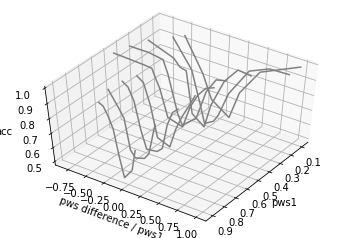

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
ax.plot3D(x1[:7], r1[:7], z1[:7], 'gray')
ax.plot3D(x2, r2, z2, 'gray')
ax.plot3D(x3, r3, z3, 'gray')
ax.plot3D(x4, r4, z4, 'gray')
ax.plot3D(x5, r5, z5, 'gray')
ax.plot3D(x6, r6, z6, 'gray')
ax.plot3D(x7, r7, z7, 'gray')
ax.plot3D(x8, r8, z8, 'gray')
ax.plot3D(x9, r9, z9, 'gray')

ax.set_xlabel('pws1')
ax.set_ylabel('pws difference / pws1')
ax.set_zlabel('acc')

ax.view_init(50, 35)
        
plt.savefig('MLP_performance_ratio' + '.pdf')

No handles with labels found to put in legend.


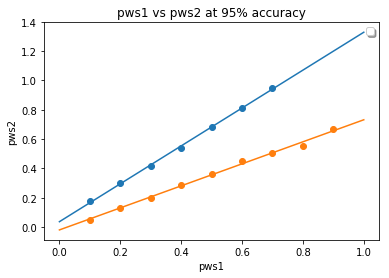

In [4]:
x95 = [0.1, 0.1, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.5, 0.5, 0.6, 0.6, 0.7, 0.7, 0.8, 0.9]
y95 = [0.05, 0.175, 0.13, 0.3, 0.2, 0.415, 0.29, 0.54, 0.36, 0.68, 0.45, 0.815, 0.505, 0.95, 0.55, 0.67]

x95_h = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
y95_h = [0.175, 0.3, 0.415, 0.54, 0.68, 0.815, 0.95]

x95_l = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y95_l = [0.05, 0.13, 0.2, 0.29, 0.36, 0.45, 0.505, 0.55, 0.67]

fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(x95_h, y95_h)
ax.scatter(x95_l, y95_l)

zipped = zip(x95, y95)
list(zipped)

#High regression: 1.29286 x + 0.0364286
fit_x = np.linspace(0.0, 1.0, num=100)
fit_y_h = 1.29286 * fit_x + 0.0364286
#Low regression: 0.751667 x - 0.0197222
fit_y_l = 0.751667 * fit_x - 0.0197222

ax.plot(fit_x, fit_y_h)
ax.plot(fit_x, fit_y_l)

plt.title('pws1 vs pws2 at 95% accuracy')
plt.legend(shadow=True, fancybox=True)
plt.xlabel('pws1')
plt.ylabel('pws2')

plt.savefig('linear_fit_at_95_per' + '.pdf')

In [41]:
#Ellipse Fitting
def fitEllipse(x,y):
    x = x[:,np.newaxis]
    y = y[:,np.newaxis]
    D =  np.hstack((x*x, x*y, y*y, x, y, np.ones_like(x)))
    S = np.dot(D.T,D)
    C = np.zeros([6,6])
    C[0,2] = C[2,0] = 2; C[1,1] = -1
    E, V =  eig(np.dot(inv(S), C))
    n = np.argmax(np.abs(E))
    a = V[:,n]
    return a

def ellipse_center(a):
    b,c,d,f,g,a = a[1]/2, a[2], a[3]/2, a[4]/2, a[5], a[0]
    num = b*b-a*c
    x0=(c*d-b*f)/num
    y0=(a*f-b*d)/num
    return np.array([x0,y0])


def ellipse_angle_of_rotation( a ):
    b,c,d,f,g,a = a[1]/2, a[2], a[3]/2, a[4]/2, a[5], a[0]
    return 0.5*np.arctan(2*b/(a-c))


def ellipse_axis_length(a):
    b,c,d,f,g,a = a[1]/2, a[2], a[3]/2, a[4]/2, a[5], a[0]
    up = 2*(a*f*f+c*d*d+g*b*b-2*b*d*f-a*c*g)
    down1=(b*b-a*c)*( (c-a)*np.sqrt(1+4*b*b/((a-c)*(a-c)))-(c+a))
    down2=(b*b-a*c)*( (a-c)*np.sqrt(1+4*b*b/((a-c)*(a-c)))-(c+a))
    res1=np.sqrt(np.absolute(up/down1))
    res2=np.sqrt(np.absolute(up/down2))
    return np.array([res1, res2])

def find_ellipse(x, y):
    xmean = x.mean()
    ymean = y.mean()
    x -= xmean
    y -= ymean
    a = fitEllipse(x,y)
    center = ellipse_center(a)
    center[0] += xmean
    center[1] += ymean
    phi = ellipse_angle_of_rotation(a)
    axes = ellipse_axis_length(a)
    x += xmean
    y += ymean
    return center, phi, axes

[0. 1. 0.]
[0.03702623+0.j 0.54159699+0.j] (0.38531770586086966+0j) [0.37316995 0.41148132]


D:\Apps\Anaconda\envs\tensorflow\lib\site-packages\matplotlib\transforms.py:2007: ComplexWarning: Casting complex values to real discards the imaginary part
  float)
D:\Apps\Anaconda\envs\tensorflow\lib\site-packages\matplotlib\transforms.py:2053: ComplexWarning: Casting complex values to real discards the imaginary part
  [[1.0, 0.0, tx], [0.0, 1.0, ty], [0.0, 0.0, 1.0]], float)


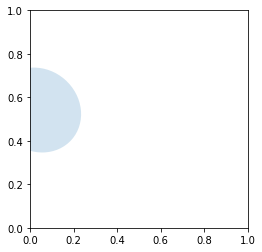

In [55]:
x = np.asarray([0.0, 0.0, 1.0])
y = np.asarray([0.0, 1.0, 0.0])
print(y)
center, phi, axes = find_ellipse(x, y)
print(center, phi, axes)

e = Ellipse(xy=center, width=axes[1], height=axes[0], angle=phi*360)

fig = plt.figure(0)
ax = fig.add_subplot(111, aspect='equal')
ax.add_artist(e)
e.set_clip_box(ax.bbox)
e.set_alpha(0.2)

In [31]:
def delay_print(s):
    for c in s:
        if c == ' ':
            sys.stdout.write(' ')
        else:
            sys.stdout.write(c)
            sys.stdout.flush()
            time.sleep(0.028)
    sys.stdout.write('\n')

In [32]:
delay_print('=========================================                                             ||')
delay_print('=========================================                                             ||')
delay_print('||          ||           ||            ||                            =====================================')
delay_print('||          ||           ||            ||                            =====================================')
delay_print('||          ||           ||            ||                                             ||')
delay_print('||          ||           ||            ||                                             ||')
delay_print('=========================================                                   =======================')
delay_print('=========================================                                   =======================')
delay_print('                 ||                                                         ||                   ||')
delay_print('                //                                                          ||                   ||')
delay_print('               //===========//                                              ||                   ||')
delay_print('              //===========//                                               =======================')
delay_print('                          //                                                =======================')
delay_print('                         //                                                        ||    ||')
delay_print('                        //                                                         ||    ||')
delay_print('                 \\\    //                                                         ||     ||')
delay_print('                  \\\  //                                                         ||      ||')
delay_print('                   \\\//                                                         ||       ||')
delay_print('                    //                                                         ||        || ')
delay_print('                   //                                                        //          ||')
delay_print('                  //                                                       //            ||               /|')
delay_print('                 //                                                      //              \\\==============/ |')
delay_print('                //                                                     //                 \\\===============/')

=========================================                                             ||
=========================================                                             ||
||          ||           ||            ||                            =====================================
||          ||           ||            ||                            =====================================
||          ||           ||            ||                                             ||
||          ||           ||            ||                                             ||
=========================================                                   =======================
=========================================                                   =======================
                 ||                                                         ||                   ||
                //                                                          ||                   ||
               //===========//

In [ ]:
=========================================                                             ||
=========================================                                             ||
||          ||           ||            ||                            =====================================
||          ||           ||            ||                            =====================================
||          ||           ||            ||                                             ||
||          ||           ||            ||                                             ||
=========================================                                   =======================
=========================================                                   =======================
                 ||                                                         ||                   ||
                //                                                          ||                   || 
               //===========//                                              ||                   ||
              //===========//                                               =======================
                          //                                                =======================
                         //                                                        ||    ||
                        //                                                         ||    ||
                 \\    //                                                         ||     ||
                  \\  //                                                         ||      ||
                   \\//                                                         ||       ||
                    //                                                         ||        ||         
                   //                                                        //          ||                 
                  //                                                       //            ||               /|
                 //                                                      //              \\==============/ |
                //                                                     //                 \\===============/